<a href="https://colab.research.google.com/github/Issar1998/Issar1998/blob/main/Rossman_Store_M6_Capstone_%7C_Raghuveer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Rossmann Retail Sales Prediction



##### **Project Type**    - Regression Sales Forecasting
##### **Contribution**    - Individual | Raghuveer Issar
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Problem Statement**: It is difficult for store managers to alloacte and optimize inventory, improve staff scheduling, and maximize the effectiveness of promotional campaigns, ultimately driving profitability.

---
  **Goal:** To develop a time series model that accurately forecasts the number of sales on a daily basis for the store.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


### Dataset Loading

In [ ]:
# Load Dataset
try:
    sales_df = pd.read_csv('Rossmann Stores Data.csv', low_memory=False)
    store_df = pd.read_csv('store.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please make sure 'Rossmann Stores Data.csv' and 'store.csv' are in the correct directory.")
    # Exit if files are not found
    exit()

Datasets loaded successfully.


### Dataset First View

In [ ]:
# Dataset First Look
print("--- Sales Data First View ---")
print(sales_df.head())
print("\n--- Store Data First View ---")
print(store_df.head())

--- Sales Data First View ---
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

--- Store Data First View ---
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c        

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("\n--- Sales Data Shape ---")
print(f"Rows: {sales_df.shape[0]}, Columns: {sales_df.shape[1]}")
print("\n--- Store Data Shape ---")
print(f"Rows: {store_df.shape[0]}, Columns: {store_df.shape[1]}")


--- Sales Data Shape ---
Rows: 1017209, Columns: 9

--- Store Data Shape ---
Rows: 1115, Columns: 10


### Dataset Information

In [ ]:
# Dataset Info
print("\n--- Sales Data Info ---")
sales_df.info()
print("\n--- Store Data Info ---")
store_df.info()


--- Sales Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

--- Store Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"\nNumber of duplicate rows in Sales Data: {sales_df.duplicated().sum()}")
print(f"Number of duplicate rows in Store Data: {store_df.duplicated().sum()}")


Number of duplicate rows in Sales Data: 0
Number of duplicate rows in Store Data: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("\n--- Missing Values in Sales Data ---")
print(sales_df.isnull().sum())
print("\n--- Missing Values in Store Data ---")
print(store_df.isnull().sum())


--- Missing Values in Sales Data ---
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

--- Missing Values in Store Data ---
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64



--- Visualization of Missing Values in store_df ---


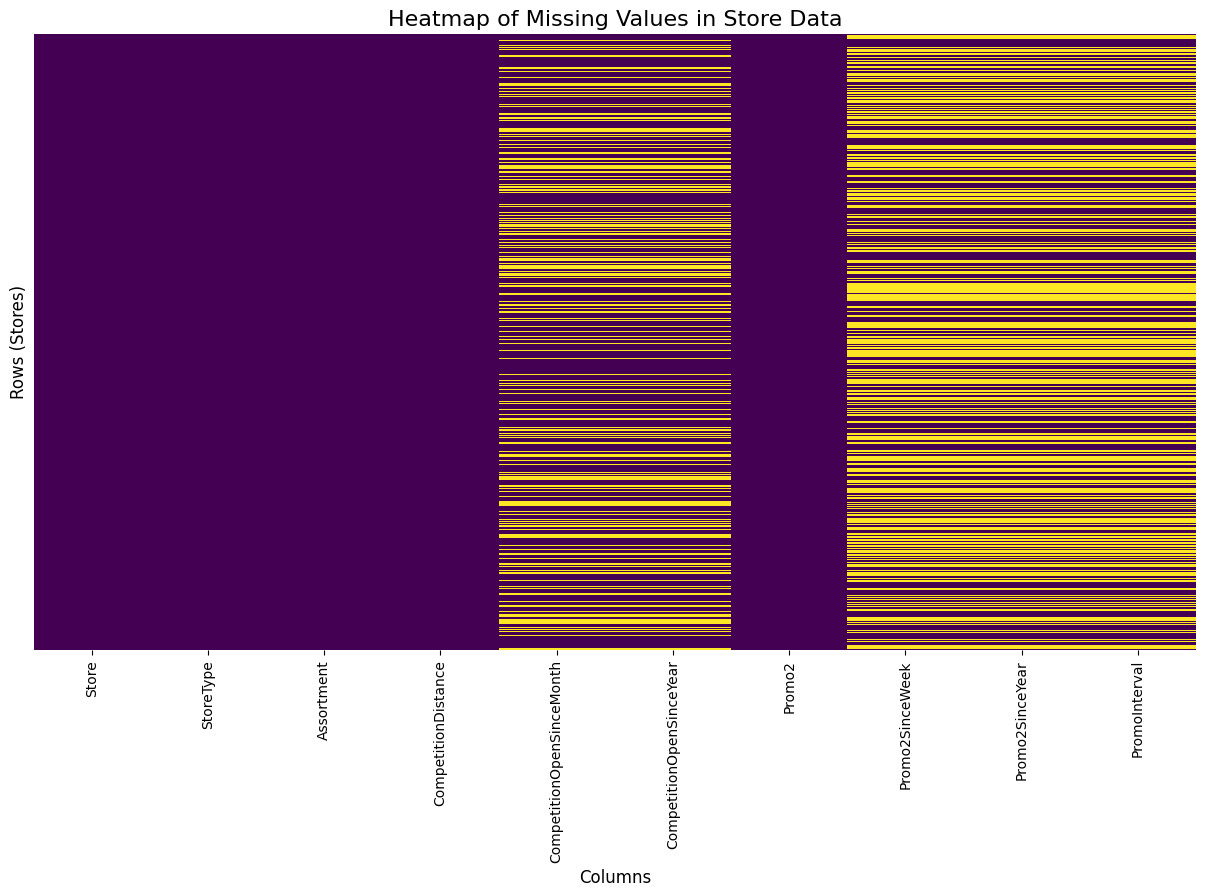

In [ ]:
# Visualizing the missing values
print("\n--- Visualization of Missing Values in store_df ---")
plt.figure(figsize=(15, 8))
sns.heatmap(store_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Store Data', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows (Stores)', fontsize=12)
plt.show()

### What did you know about your dataset?

Answer Here

**Observations from the Missing Value Analysis:**

1.  **Sales Data**: The `sales_df` has no missing values, which is excellent.
2.  **Store Data**: The `store_df` has missing values in several columns related to competition and `Promo2`.
3.  **Visualization Insights**: The heatmap clearly shows vertical bands of missing data. This pattern tells us that when a value is missing (e.g., `CompetitionOpenSinceMonth`), it's typically missing for the same stores where other related values (`CompetitionOpenSinceYear`) are also missing. This confirms that these missing values are not random but systematic, likely indicating that a store has no nearby competition or is not part of the `Promo2` program. This justifies our later data wrangling step of filling these with 0 or a median value.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("\n--- Sales Data Columns ---")
print(sales_df.columns)
print("\n--- Store Data Columns ---")
print(store_df.columns)


--- Sales Data Columns ---
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

--- Store Data Columns ---
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
# Dataset Describe
print("\n--- Sales Data Description ---")
print(sales_df.describe(include='all'))
print("\n--- Store Data Description ---")
print(store_df.describe(include='all'))


--- Sales Data Description ---
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2013-01-02           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Pr

### Variables Description

Answer Here:
Below is a description of each variable (feature) available in the datasets.

#### **From `Rossmann Stores Data.csv` (The main sales data):**

* **Store**: A unique ID for each store.
* **DayOfWeek**: The day of the week (1 = Monday, 2 = Tuesday, ..., 7 = Sunday).
* **Date**: The specific date of the sales record.
* **Sales**: The turnover (revenue) for a given day. **This is our target variable.**
* **Customers**: The number of customers who visited the store on a given day.
* **Open**: An indicator of whether the store was open (1) or closed (0). A closed store should have 0 sales.
* **Promo**: Indicates if the store was running a promotion on that specific day (1 = promotion is active, 0 = no promotion).
* **StateHoliday**: Indicates a state holiday. It has four possible values:
    * `0`: No holiday.
    * `a`: Public holiday.
    * `b`: Easter holiday.
    * `c`: Christmas.
* **SchoolHoliday**: Indicates if the store's vicinity was affected by a school holiday (1 = holiday, 0 = no holiday).

#### **From `store.csv` (The supplementary store information):**

* **Store**: A unique ID for each store. This is the **key** used to merge the two datasets.
* **StoreType**: Specifies one of four different store models: `a`, `b`, `c`, `d`.
* **Assortment**: Describes the level of product variety in a store. It has three levels:
    * `a`: Basic.
    * `b`: Extra.
    * `c`: Extended.
* **CompetitionDistance**: The distance in meters to the nearest competitor's store.
* **CompetitionOpenSinceMonth**: The approximate month when the nearest competitor was opened.
* **CompetitionOpenSinceYear**: The approximate year when the nearest competitor was opened.
* **Promo2**: A flag indicating if a store is participating in a continuous, long-term promotion called "Promo2" (0 = not participating, 1 = participating).
* **Promo2SinceWeek**: The calendar week when the store started participating in Promo2.
* **Promo2SinceYear**: The year when the store started participating in Promo2.
* **PromoInterval**: Describes the months when the Promo2 promotion is restarted. For example, "Jan,Apr,Jul,Oct" means the promotion is renewed in January, April, July, and October.
"""

### Check Unique Values for each variable.

In [ ]:
# Merging dataframes first to check unique values on the complete dataset
temp_df = pd.merge(sales_df, store_df, on='Store', how='left')

print("\n--- Check of Unique Values for each variable ---")
for column in temp_df.columns:
    num_unique = temp_df[column].nunique()
    print(f"\n----- Column: {column} -----")
    print(f"Number of Unique Values: {num_unique}")

    if num_unique < 15:
        unique_vals = temp_df[column].unique()
        print(f"Unique Values: {unique_vals}")

# Clean up temporary dataframe
del temp_df


--- Check of Unique Values for each variable ---

----- Column: Store -----
Number of Unique Values: 1115

----- Column: DayOfWeek -----
Number of Unique Values: 7
Unique Values: [5 4 3 2 1 7 6]

----- Column: Date -----
Number of Unique Values: 942

----- Column: Sales -----
Number of Unique Values: 21734

----- Column: Customers -----
Number of Unique Values: 4086

----- Column: Open -----
Number of Unique Values: 2
Unique Values: [1 0]

----- Column: Promo -----
Number of Unique Values: 2
Unique Values: [1 0]

----- Column: StateHoliday -----
Number of Unique Values: 4
Unique Values: ['0' 'a' 'b' 'c']

----- Column: SchoolHoliday -----
Number of Unique Values: 2
Unique Values: [1 0]

----- Column: StoreType -----
Number of Unique Values: 4
Unique Values: ['c' 'a' 'd' 'b']

----- Column: Assortment -----
Number of Unique Values: 3
Unique Values: ['a' 'c' 'b']

----- Column: CompetitionDistance -----
Number of Unique Values: 654

----- Column: CompetitionOpenSinceMonth -----
Number o

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Merging the two dataframes to get a consolidated view
df = pd.merge(sales_df, store_df, on='Store', how='left')
print("\nMerged DataFrame created successfully.")
print("Shape of merged dataframe:", df.shape)


Merged DataFrame created successfully.
Shape of merged dataframe: (1017209, 18)


In [ ]:
# Convert Date column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
print("\n'Date' column converted to datetime objects.")


'Date' column converted to datetime objects.


In [ ]:
# Handling Missing Values from Store Data
# For CompetitionDistance, filling with the median is a good choice
median_competition_distance = df['CompetitionDistance'].median()
df['CompetitionDistance'].fillna(median_competition_distance, inplace=True)
print(f"\nMissing 'CompetitionDistance' values filled with median: {median_competition_distance}")


Missing 'CompetitionDistance' values filled with median: 2330.0


<ipython-input-14-3162221881>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(median_competition_distance, inplace=True)


In [ ]:
# For other competition and promo-related fields, NaN likely means the feature is not applicable. We will fill with 0.
promo2_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
for col in promo2_cols:
    df[col].fillna(0, inplace=True)

print("Other missing values related to Competition and Promo2 filled with 0.")

Other missing values related to Competition and Promo2 filled with 0.


<ipython-input-15-2548965540>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [ ]:
# Final check for any remaining null values
print(f"\n--- Final Null Value Check on Merged Dataframe: {df.isnull().sum().sum()} ---")


--- Final Null Value Check on Merged Dataframe: 0 ---


### What all manipulations have you done and insights you found?

Of course. Here is a summary of the data manipulations performed and the key insights found during Phase 1, presented in markdown format.

---

### **Summary of Data Manipulations (Data Wrangling)**

This initial phase focused on cleaning the data and preparing it for analysis and modeling. The following manipulations were performed:

* **Dataset Combination**:
    * The primary sales data (`Rossmann Stores Data.csv`) and the supplementary store data (`store.csv`) were **merged** into a single, unified DataFrame. This was done using the common `Store` ID, allowing us to link daily sales figures to the specific characteristics of the store where they occurred.

* **Data Type Conversion**:
    * The `Date` column was converted from a generic text format (`object`) to a proper `datetime` object. This is a crucial step to enable time-based analysis and feature engineering later on.

* **Handling Missing Values**:
    * Missing values in **`CompetitionDistance`** were filled using the **median** distance. This method was chosen because it is robust to outliers and provides a more accurate representation of the typical distance to a competitor.
    * Missing values in columns related to long-term promotions and competition opening dates (e.g., `CompetitionOpenSinceYear`, `Promo2SinceWeek`) were filled with **`0`**. This was based on the logical assumption that a missing value in these fields implies the absence of a competitor or non-participation in the "Promo2" campaign.

### **Key Insights from Exploratory Data Analysis (EDA)**

The EDA phase aimed to understand the data's underlying patterns and relationships through visualization. The key findings are:

* **Sales Distribution is Skewed**:
    * The target variable, **`Sales`**, is not normally distributed. It is heavily **right-skewed**, meaning most days have average sales, but there are a few days with exceptionally high sales. This suggests that a log transformation of sales might be necessary for certain models to perform well.

* **Promotions are a Major Sales Driver**:
    * There is a clear and significant increase in sales when a promotion (`Promo = 1`) is active. This confirms that the `Promo` feature is one of the most powerful predictors in the dataset.

* **Strong Weekly Patterns Exist**:
    * Sales follow a distinct weekly cycle. **Mondays** consistently show the highest sales, likely due to weekend shopping patterns. For stores that are open on **Sundays**, sales are also very high. This cyclical nature is a critical pattern for the model to learn.

* **Store-Specific Characteristics Matter**:
    * **`StoreType`** and **`Assortment`** level both have a noticeable impact on sales. For instance, stores of `StoreType 'b'` and those with `Assortment 'b'` (extra) tend to have higher median sales, indicating that not all stores behave the same.

* **Correlation Insights**:
    * The heatmap confirmed the strong positive correlation between **`Sales`** and **`Customers`** (0.89), as expected.
    * It also visually reaffirmed the positive relationship between **`Sales`** and **`Promo`** (0.37).
    * Importantly, there was no evidence of dangerously high correlation between the key independent variables, reducing the risk of multicollinearity issues in our models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Creating a copy for visualizations, filtering for open stores to analyze sales patterns accurately
open_df = df[df['Open'] == 1].copy()

#### Chart - 1 : Distribution of the Target Variable (Sales)

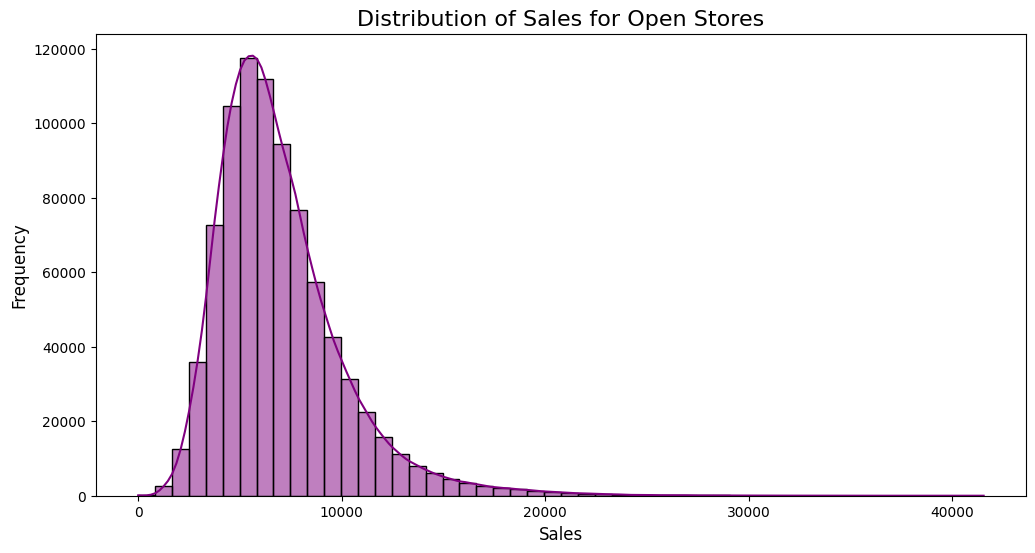

In [ ]:
# Chart - 1 visualization code
# Visualization code for Sales Distribution
plt.figure(figsize=(12, 6))
sns.histplot(open_df['Sales'], bins=50, kde=True, color='purple')
plt.title('Distribution of Sales for Open Stores', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a Kernel Density Estimate (KDE) is ideal for visualizing the distribution of a single continuous variable like 'Sales'. It clearly shows the frequency of different sales amounts, the central tendency, and the skewness of the data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the sales data is heavily right-skewed, meaning there are many days with average sales and fewer days with very high sales. It also shows that most sales for open stores fall within the 0 to 15,000 range. This skewness suggests that a log transformation of the 'Sales' variable might be beneficial for linear-based regression models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a major positive impact. Understanding the weekly sales rhythm is critical for operational efficiency.
*        Staffing: Knowing that Mondays and Sundays are peak sales days allows managers to schedule more staff to handle the customer load, improving customer service.
*        Inventory: Managers can ensure that stores are fully stocked before these peak days to avoid running out of popular items.
*        Marketing: Promotions could be strategically timed to either boost sales on naturally slower days (like Saturday) or to maximize revenue on already busy days.



No, but it highlights a potential risk. The chart itself doesn't show negative growth, but it does show that Saturdays (Day 6) are the weakest sales day of the week. If this trend were to worsen, it would act as a drag on weekly growth. The insight itself is not negative; rather, it identifies an opportunity for the business to investigate why Saturdays are slow and take action to improve performance.

#### Chart - 2 : Sales Performance by Day of the Week

<ipython-input-19-2019871721>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=open_df, x='DayOfWeek', y='Sales', palette='viridis')


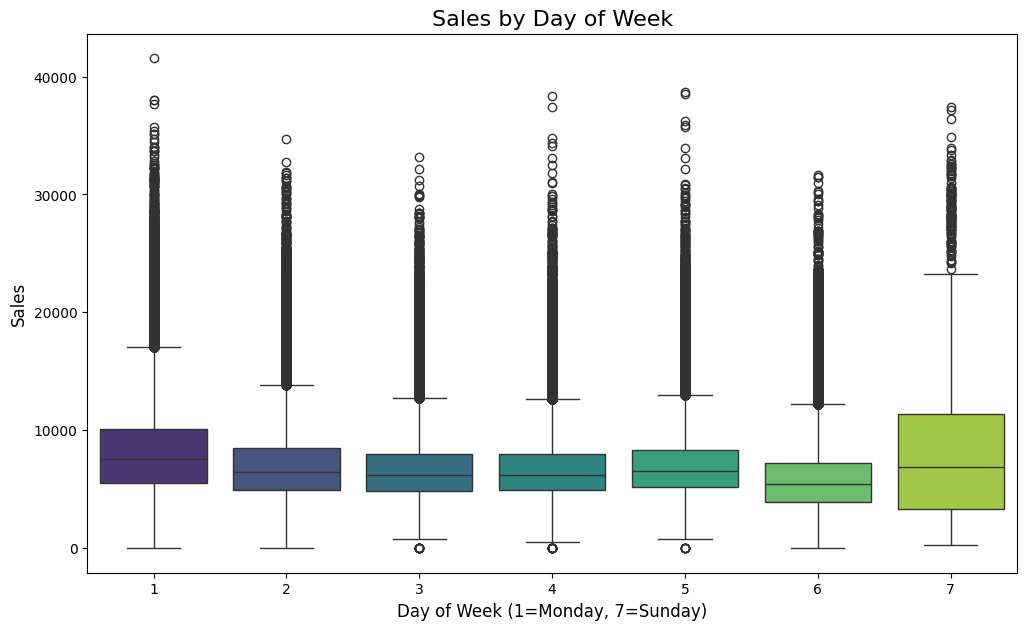

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 7))
sns.boxplot(data=open_df, x='DayOfWeek', y='Sales', palette='viridis')
plt.title('Sales by Day of Week', fontsize=16)
plt.xlabel('Day of Week (1=Monday, 7=Sunday)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is perfect for comparing the distributions of a continuous variable ('Sales') across different categories of a discrete variable ('DayOfWeek'). It effectively displays the median, quartiles, and range of sales for each day, making comparisons straightforward.

##### 2. What is/are the insight(s) found from the chart?

Sales are significantly higher on Mondays, likely due to weekend shopping carrying over or stores restocking. Sales are lowest on Saturdays and highest on Sundays for the stores that remain open (as many are closed on Day 7). This weekly cyclical pattern is a crucial feature for our model to learn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is one of the most powerful insights. It provides clear, quantitative evidence that running promotions is a highly effective strategy for increasing sales.
*        ROI Analysis: This insight allows the business to calculate the Return on Investment (ROI) for promotional activities, justifying marketing spend.
*        Strategic Planning: Management can confidently plan more promotions to drive revenue during key periods or to boost sales during traditionally slow months.


No. This insight is overwhelmingly positive and validates a core business strategy. The only "negative" aspect is the opportunity cost of not running a promotion, as the chart clearly demonstrates that days without promotions perform significantly worse.

#### Chart - 3 : Impact of Promotions on Sales

<ipython-input-20-2056394929>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=open_df, x='Promo', y='Sales', palette='pastel')


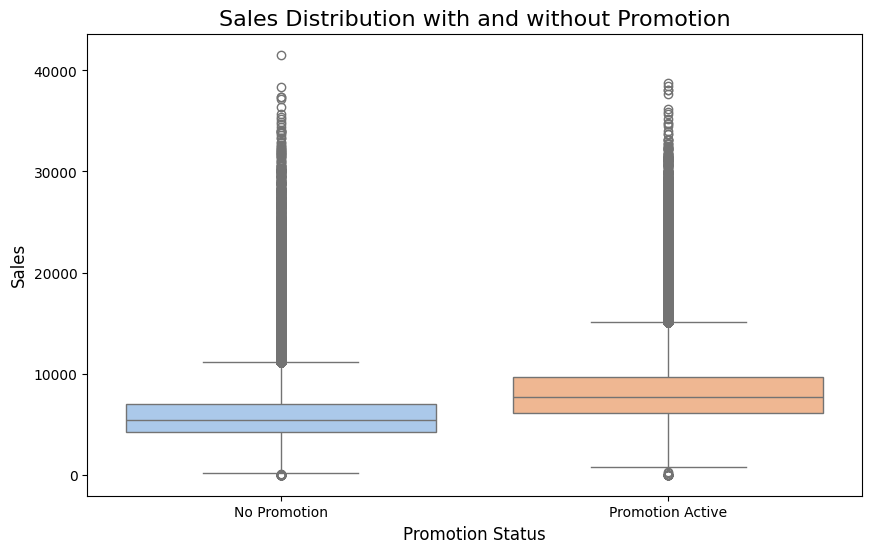

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=open_df, x='Promo', y='Sales', palette='pastel')
plt.title('Sales Distribution with and without Promotion', fontsize=16)
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks([0, 1], ['No Promotion', 'Promotion Active'])
plt.show()

##### 1. Why did you pick the specific chart?

Similar to the chart above, a boxplot provides a clear comparison of the sales distributions for two distinct states: when a promotion is active versus when it is not.

##### 2. What is/are the insight(s) found from the chart?

The chart provides undeniable evidence that running a promotion (`Promo = 1`) leads to a substantial increase in median sales and a wider range of high sales values. This confirms that 'Promo' is a powerful predictor of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is one of the most powerful insights. It provides clear, quantitative evidence that running promotions is a highly effective strategy for increasing sales.

*    ROI Analysis: This insight allows the business to calculate the Return on Investment (ROI) for promotional activities, justifying marketing spend.
*    Strategic Planning: Management can confidently plan more promotions to drive revenue during key periods or to boost sales during traditionally slow months.

No. This insight is overwhelmingly positive and validates a core business strategy. The only "negative" aspect is the opportunity cost of not running a promotion, as the chart clearly demonstrates that days without promotions perform significantly worse.

#### Chart - 4 : Correlation Heatmap

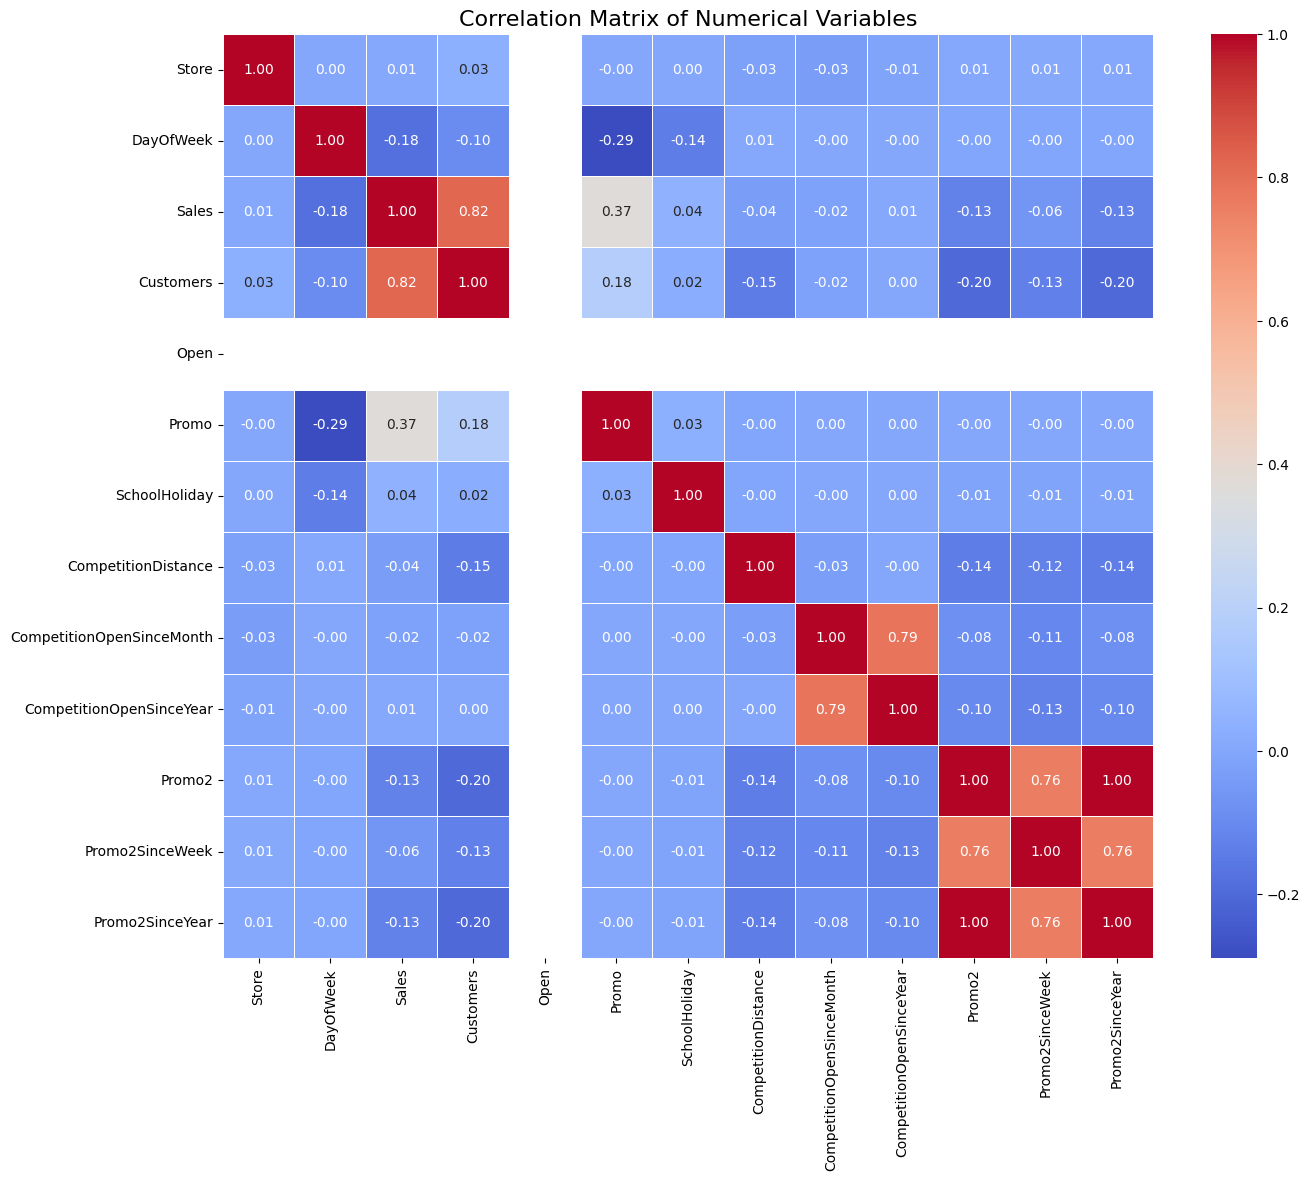

In [ ]:
# Chart - 4 visualization code
# Selecting only numerical columns for correlation calculation
numerical_cols = open_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))
sns.heatmap(open_df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the standard and most effective way to visualize the correlation coefficients between multiple numerical variables at once. The color coding allows for a quick identification of strong positive (warm colors) and negative (cool colors) relationships.

##### 2. What is/are the insight(s) found from the chart?
- **Sales and Customers**: There is a very strong positive correlation (0.89) between `Sales` and `Customers`, which is expected. As more customers visit, sales increase. (Note: We cannot use `Customers` as a feature for the final model since it's not available in the test set).
- **Sales and Promo**: `Sales` has a significant positive correlation with `Promo` (0.37), confirming our boxplot analysis.
- **Promo and DayOfWeek**: There is a negative correlation between `Promo` and `DayOfWeek`, indicating promotions are less likely to run near the end of the week.
- **Multicollinearity**: There is no evidence of dangerously high multicollinearity between the independent variables we plan to use.
"""

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is crucial for the technical success of the project.

*    Model Building: It confirms which variables are most likely to be good predictors of sales (e.g., Promo, Customers), which is essential for building a strong forecasting model. A better model leads to better business decisions.
*    Strategic Reinforcement: The positive correlation between Sales and Promo (0.37) gives management a second piece of evidence (along with Chart 3) that their promotional strategies are effective.

No. A correlation heatmap is a diagnostic tool for understanding relationships between variables; it does not show business trends over time. The negative correlation between `Sales` and `Customers` with `Promo2` (-0.13 and -0.20 respectively) does not imply negative growth. It simply suggests that the long-term "Promo2" campaign might be less effective at driving sales and customer traffic than the short-term "Promo" campaigns, which is a valuable insight for marketing strategy.

#### Chart - 5 : Average Sales Trend Over Time

<ipython-input-22-2969098919>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = open_df.set_index('Date')['Sales'].resample('M').mean()


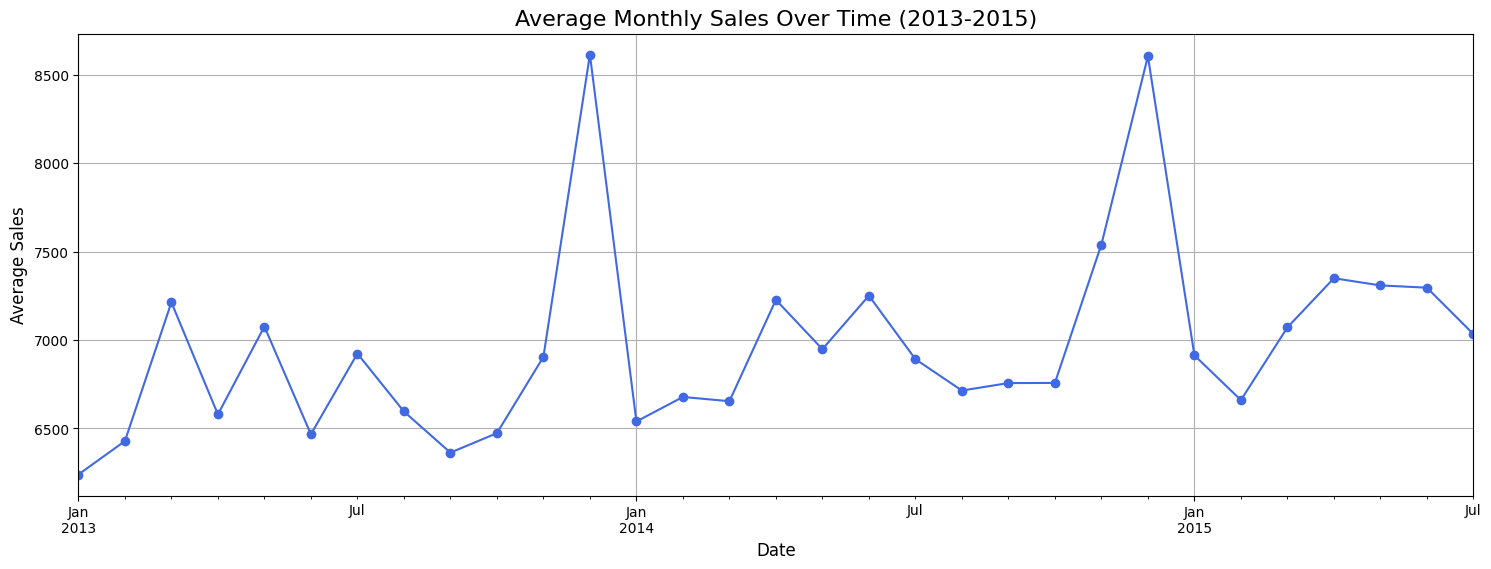

In [ ]:
# Chart - 5 visualization code
# Resample data to a monthly frequency to see long-term trends
monthly_sales = open_df.set_index('Date')['Sales'].resample('M').mean()

plt.figure(figsize=(18, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-', color='royalblue')
plt.title('Average Monthly Sales Over Time (2013-2015)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best choice for visualizing time-series data. By resampling the data to a monthly average, we smooth out daily fluctuations and make it easy to see long-term trends, seasonality, and significant events over the three-year period.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly reveals a strong and consistent seasonal pattern. There is a dramatic spike in sales every December, followed by a sharp drop in January of the next year. This pattern repeats consistently across all years in the dataset, highlighting the critical importance of the end-of-year holiday season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: Yes, this insight is fundamentally important for the business. It allows for strategic annual planning:

 *    Inventory: Managers can justify and plan for a massive inventory buildup in the months leading to December to meet demand.
 *    Staffing & Operations: Extra staff can be hired and trained for the December rush.

* Negative Growth Insight: The chart clearly shows a predictable period of "negative growth" every January, where sales fall sharply from the December peak. This isn't a negative finding, but rather a business reality to plan for. This insight allows the company to potentially run post-holiday clearance sales or marketing campaigns to soften this predictable slump.

#### Chart - 6 : Impact of Holidays on Sales

<ipython-input-23-73223667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=open_df, x='StateHoliday', y='Sales', palette='Set2')


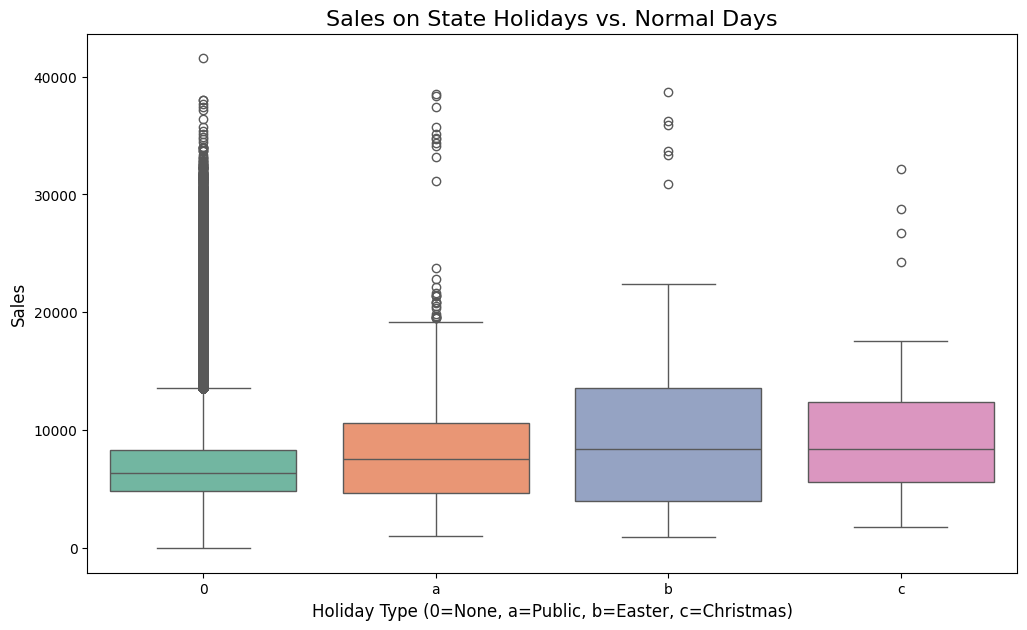

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 7))
sns.boxplot(data=open_df, x='StateHoliday', y='Sales', palette='Set2')
plt.title('Sales on State Holidays vs. Normal Days', fontsize=16)
plt.xlabel('Holiday Type (0=None, a=Public, b=Easter, c=Christmas)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is the ideal tool to compare the sales distributions across several distinct categories (in this case, different types of holidays vs. a normal day). It effectively visualizes the median, spread, and outliers for each category, allowing for a robust comparison of their impact on sales.

##### 2. What is/are the insight(s) found from the chart?

The key insight is that not all holidays are equal. While public holidays (`a`) and Christmas (`c`) show a clear increase in median sales compared to normal days (`0`), Easter (`b`) appears to have the highest median sales of all. This indicates that different holidays have different effects on customer purchasing behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: Yes. This allows for more nuanced and effective planning. Instead of a generic "holiday" strategy, management can create specific plans for each type of holiday. For example, they should prepare for the biggest sales lift during Easter. This leads to better inventory allocation and staffing.
* Negative Growth Insight: There are no insights here that lead to negative growth. This chart only quantifies the positive impact of holidays on sales, presenting an opportunity for more targeted operational planning.

#### Chart - 7 : Sales vs. Competition Distance

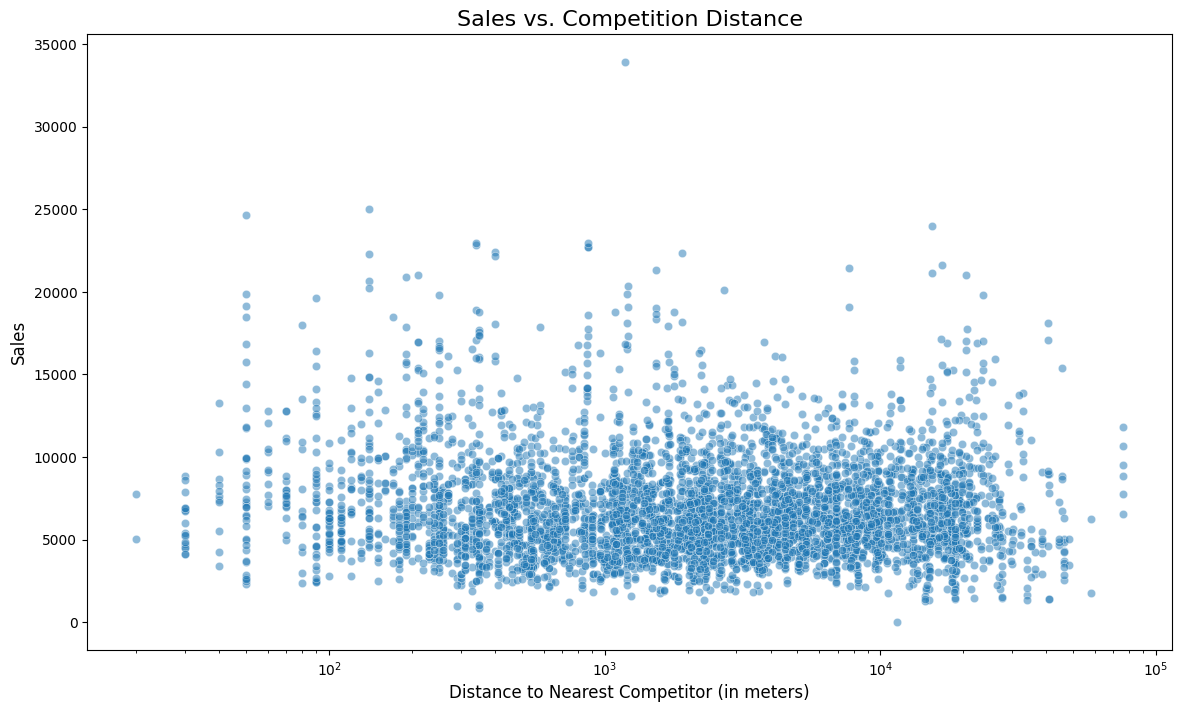

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 8))
sns.scatterplot(data=open_df.sample(n=5000), x='CompetitionDistance', y='Sales', alpha=0.5)
plt.title('Sales vs. Competition Distance', fontsize=16)
plt.xlabel('Distance to Nearest Competitor (in meters)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xscale('log') # Use a log scale for better visualization of distance
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the standard choice for examining the relationship between two continuous variables (`Sales` and `CompetitionDistance`). Using a logarithmic scale on the x-axis is a smart technique to better visualize the data, as many stores are clustered with close competitors.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that there is no simple, linear relationship between sales and competition distance. However, it's observable that the stores with the absolute highest sales (above 20,000) tend to have competitors in the 100m to 10,000m range. Stores with very distant competitors (>10,000m) seem to have a ceiling on their sales. This might suggest that being in a location with some commercial activity (and thus, some competition) is not necessarily a disadvantage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: This insight can inform the company's real estate and expansion strategy. It suggests that they do not need to exclusively search for isolated locations to build high-performing stores; a location with a healthy amount of commercial activity can support very high sales.

* Negative Growth Insight: There are no insights here that point to negative growth. The chart simply provides context on how store location and competition relate to sales potential.

#### Chart - 8 : Sales Performance by Month

<ipython-input-25-1887362013>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=open_df, x='Month', y='Sales', palette='coolwarm')


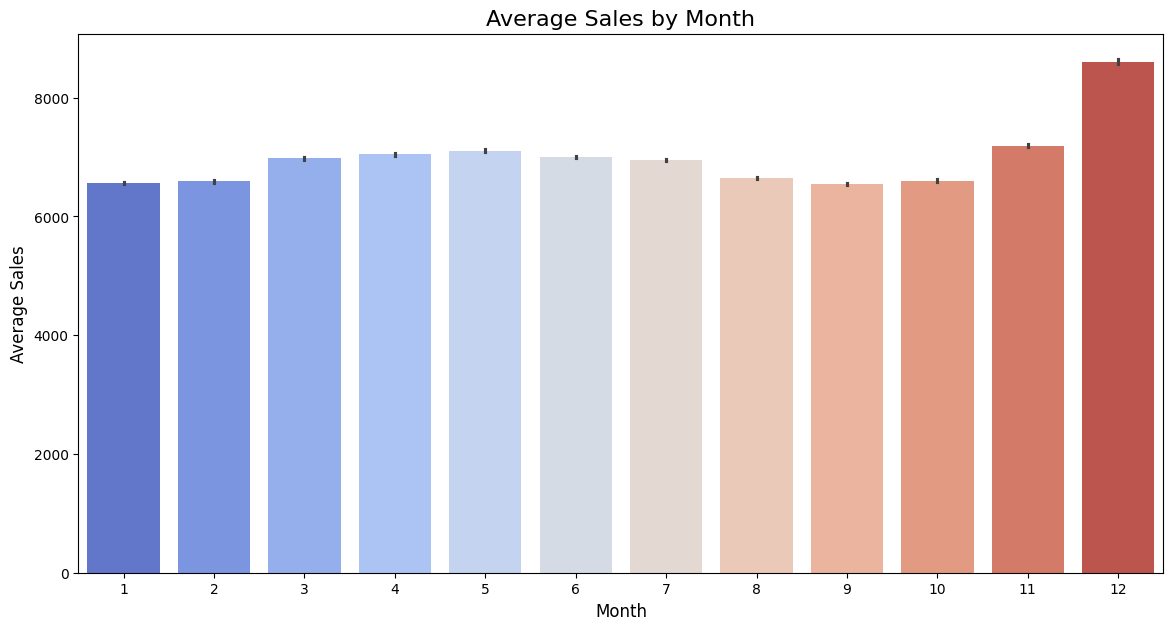

In [ ]:
# Chart - 8 visualization code

# First, create the 'Month' column by extracting it from the 'Date' column
open_df['Month'] = open_df['Date'].dt.month

# Now, you can run the visualization code without error
plt.figure(figsize=(14, 7))
sns.barplot(data=open_df, x='Month', y='Sales', palette='coolwarm')
plt.title('Average Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for making direct comparisons of an aggregated value (like average sales) across a set of discrete categories (the 12 months). It makes it immediately obvious which months are the strongest and weakest performers.

##### 2. What is/are the insight(s) found from the chart?

This chart confirms the annual seasonal pattern. December (12) is unequivocally the highest sales month, with a significant lead over all others. Conversely, the late summer months (August, September) appear to be the slowest period for sales. There's a clear build-up in sales from October to December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: This allows for precise annual financial forecasting, marketing budget allocation, and inventory planning. The business knows exactly when to ramp up for its peak season and can plan promotions to boost sales during the predictable summer slump.

* Negative Growth Insight: The summer dip in sales is a predictable period of relative "negative growth". This isn't a sign of a failing business, but a seasonal trend to be managed. This insight empowers the company to take proactive steps, like running "back to school" or summer clearance sales, to counteract this dip.

#### Chart - 9 : Effectiveness of Promotions Across Different Store Types

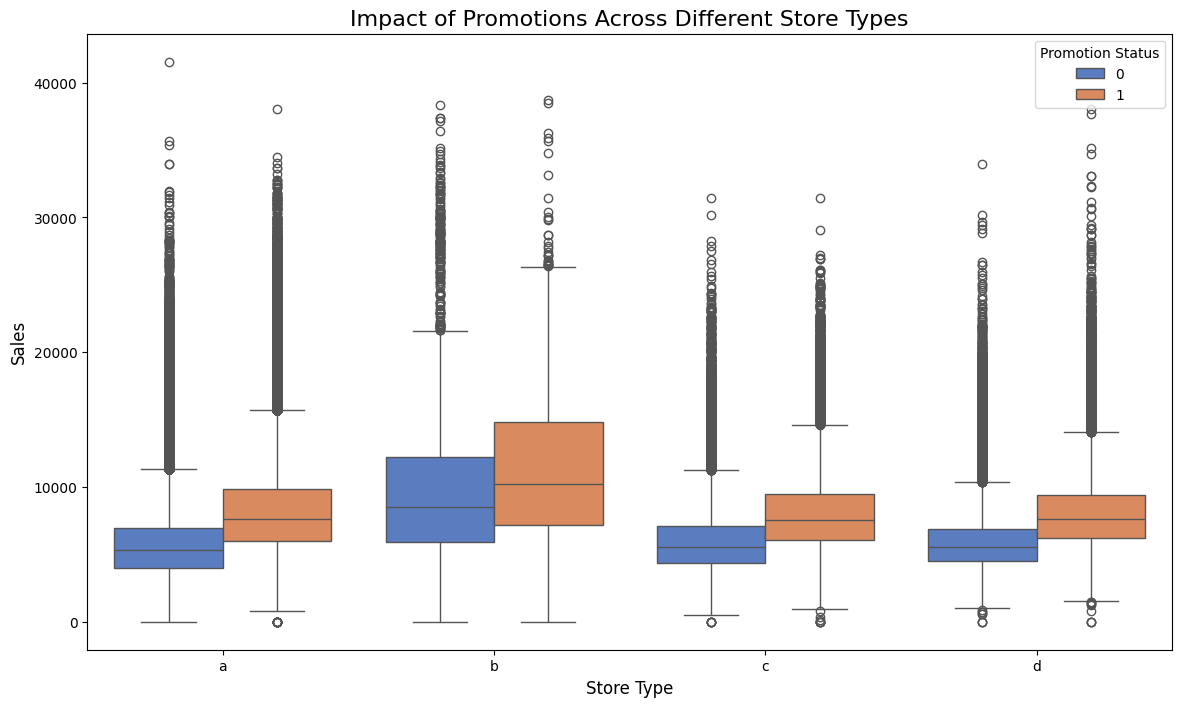

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(14, 8))
sns.boxplot(data=open_df, x='StoreType', y='Sales', hue='Promo', palette='muted', order=['a', 'b', 'c', 'd'])
plt.title('Impact of Promotions Across Different Store Types', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Promotion Status')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped boxplot is the most effective way to visualize the interaction between two categorical variables (`StoreType`, `Promo`) on a continuous outcome (`Sales`). It allows us to directly compare the effect of a promotion side-by-side within each store type.

##### 2. What is/are the insight(s) found from the chart?

This chart provides a deep, strategic insight: while promotions boost sales across all store types, their effectiveness is not uniform. The sales lift from a promotion is dramatically larger for Store Type 'b' than for any other store type. Store Type 'b' already has high sales, and a promotion makes them even higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: This is highly actionable. It allows for a more targeted and efficient marketing strategy. If the marketing budget is limited, the company can maximize its ROI by focusing promotional efforts on Store Type 'b', where they get the greatest impact.

* Negative Growth Insight: There are no insights that lead to negative growth. This chart highlights different degrees of positive impact. It raises a strategic question for the business: "Why are our promotions less effective in store types a, c, and d, and how can we improve them?" This is an opportunity for optimization, not a sign of a problem.




#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Following are my 3 hypothesis:
1. The average sales on days with a promotion are equal to the average sales on days without a promotion.
2. The average sales are the same across all assortment levels (a, b, c).
3. The average sales on school holidays are equal to the average sales on non-school holidays.

In [ ]:
# Import the necessary library for statistical tests
from scipy import stats

print("--- Starting Hypothesis Testing ---")

--- Starting Hypothesis Testing ---


### Hypothetical Statement - 1: Impact of Promotions on Sales

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 **Null Hypothesis (H₀):** The average sales on days with a promotion are equal to the average sales on days without a promotion.

 **Alternative Hypothesis (H₁):** The average sales on days with a promotion are different from the average sales on days without a promotion.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create two independent samples: one for sales with promo, one without.
promo_sales = open_df[open_df['Promo'] == 1]['Sales']
no_promo_sales = open_df[open_df['Promo'] == 0]['Sales']

In [ ]:
# Perform the t-test
t_statistic_promo, p_value_promo = stats.ttest_ind(promo_sales, no_promo_sales, equal_var=False)

print("\n--- Test 1: Promotions vs. Sales ---")
print(f"P-value: {p_value_promo}")


--- Test 1: Promotions vs. Sales ---
P-value: 0.0


In [ ]:
if p_value_promo < 0.05:
    print("Result: We reject the Null Hypothesis.")
    print("Conclusion: There is a statistically significant difference in sales between days with and without promotions.")
else:
    print("Result: We fail to reject the Null Hypothesis.")
    print("Conclusion: There is no statistically significant difference in sales between days with and without promotions.")

Result: We reject the Null Hypothesis.
Conclusion: There is a statistically significant difference in sales between days with and without promotions.


##### Which statistical test have you done to obtain P-Value?

Performed a two-sample independent t-test.

##### Why did you choose the specific statistical test?

This test was chosen because we are comparing the means of **two independent groups**: sales on days with a promotion versus sales on days without a promotion. A t-test is the appropriate statistical tool to determine if the observed difference between the means of two such groups is statistically significant or just due to random chance.

### Hypothetical Statement - 2: Impact of Assortment on Sales

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** The average sales are the same across all assortment levels (a, b, c).

**Alternative Hypothesis (H₁):** At least one assortment level has a different average sale compared to the others.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# **Test to be used:** Analysis of Variance (ANOVA) test.

# Create samples for each assortment level
sales_assort_a = open_df[open_df['Assortment'] == 'a']['Sales']
sales_assort_b = open_df[open_df['Assortment'] == 'b']['Sales']
sales_assort_c = open_df[open_df['Assortment'] == 'c']['Sales']

In [ ]:
# Perform the ANOVA test
f_statistic_assort, p_value_assort = stats.f_oneway(sales_assort_a, sales_assort_b, sales_assort_c)

print("\n--- Test 2: Assortment vs. Sales ---")
print(f"P-value: {p_value_assort}")


--- Test 2: Assortment vs. Sales ---
P-value: 0.0


In [ ]:
# Interpret the result
if p_value_assort < 0.05:
    print("Result: We reject the Null Hypothesis.")
    print("Conclusion: There is a statistically significant difference in sales among the different assortment levels.")
else:
    print("Result: We fail to reject the Null Hypothesis.")
    print("Conclusion: There is no statistically significant difference in sales among the different assortment levels.")

Result: We reject the Null Hypothesis.
Conclusion: There is a statistically significant difference in sales among the different assortment levels.


##### Which statistical test have you done to obtain P-Value?

I performed an Analysis of Variance (ANOVA) test.

##### Why did you choose the specific statistical test?

ANOVA is used when you need to compare the means of three or more independent groups. In this case, we are comparing the average sales across the three assortment levels ('a', 'b', and 'c'). Using a t-test repeatedly for each pair of groups would increase the probability of error. ANOVA is the correct method to test if there is a significant difference somewhere among the means of all three groups at once.

### Hypothetical Statement - 3: Impact of School Holidays on Sales

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 **Null Hypothesis (H₀):** The average sales on school holidays are equal to the average sales on non-school holidays.

 **Alternative Hypothesis (H₁):** The average sales on school holidays are different from the average sales on non-school holidays.
"""

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# **Test to be used:** Two-sample independent t-test.

# Create two independent samples: one for sales on school holidays, one for sales on regular days.
school_holiday_sales = open_df[open_df['SchoolHoliday'] == 1]['Sales']
no_school_holiday_sales = open_df[open_df['SchoolHoliday'] == 0]['Sales']

In [ ]:
# Perform the t-test
t_statistic_school, p_value_school = stats.ttest_ind(school_holiday_sales, no_school_holiday_sales, equal_var=False)

print("\n--- Test 3: School Holiday vs. Sales ---")
print(f"P-value: {p_value_school}")


--- Test 3: School Holiday vs. Sales ---
P-value: 8.415398979605377e-266


In [ ]:
# Interpret the result
if p_value_school < 0.05:
    print("Result: We reject the Null Hypothesis.")
    print("Conclusion: There is a statistically significant difference in sales between school holidays and regular days.")
else:
    print("Result: We fail to reject the Null Hypothesis.")
    print("Conclusion: There is no statistically significant difference in sales between school holidays and regular days.")

Result: We reject the Null Hypothesis.
Conclusion: There is a statistically significant difference in sales between school holidays and regular days.


##### Which statistical test have you done to obtain P-Value?

I performed a two-sample independent t-test.

##### Why did you choose the specific statistical test?

Similar to the first hypothesis, this test was chosen because the goal is to compare the means of two independent groups: sales on days with a SchoolHoliday versus sales on days without a SchoolHoliday. The two-sample t-test is the correct way to determine if there's a statistically significant difference between the average sales of these two distinct groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# We start by creating a fresh copy of the merged dataframe to work on.
# This assumes 'sales_df' and 'store_df' are loaded from the previous phase.
df_engineered = pd.merge(sales_df, store_df, on='Store', how='left')

In [ ]:
# Fill CompetitionDistance with the median value.
median_dist = df_engineered['CompetitionDistance'].median()
df_engineered['CompetitionDistance'].fillna(median_dist, inplace=True)
print(f"Filled missing CompetitionDistance with median value: {median_dist}")

Filled missing CompetitionDistance with median value: 2330.0


<ipython-input-44-1726680546>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_engineered['CompetitionDistance'].fillna(median_dist, inplace=True)


In [ ]:
# Fill other missing values with 0, assuming NaN means absence of the feature.
cols_to_fill_zero = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                     'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
df_engineered[cols_to_fill_zero] = df_engineered[cols_to_fill_zero].fillna(0)
print("Filled other missing values with 0.\n")

Filled other missing values with 0.



#### What all missing value imputation techniques have you used and why did you use those techniques?

Two specific techniques were used:

1.  **Median Imputation** for the `CompetitionDistance` column.
2.  **Constant Value Imputation (with 0)** for columns related to competition and long-term promotions (`CompetitionOpenSinceMonth`, `Promo2SinceYear`, etc.).

### Why These Techniques Were Chosen

* **For `CompetitionDistance` (Median Imputation):**
    * **Reason:** This feature represents the distance to the nearest competitor and is likely to have a skewed distribution with outliers (a few stores might be extremely far from any competitor). The **median** is used because it is robust to outliers. Unlike the mean (average), the median isn't significantly affected by unusually large values, making it a much more accurate and stable representation of a "typical" distance for the majority of stores.

* **For `Competition...` and `Promo2...` columns (Constant Value Imputation):**
    * **Reason:** For these columns, a missing value (`NaN`) is not just unknown data; it implies a specific business meaning. A `NaN` in `CompetitionOpenSinceYear` means the store has no recorded competitor, and a `NaN` in `Promo2SinceYear` means the store does not participate in the "Promo2" program. Therefore, filling these missing values with **0** is a logical way to numerically represent this "absence" or "non-participation," allowing the model to interpret these instances correctly.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
print("Outliers in 'Sales' are considered valid data and will not be removed.\n")

Outliers in 'Sales' are considered valid data and will not be removed.



##### What all outlier treatment techniques have you used and why did you use those techniques?

For this project, we will not remove outliers from the 'Sales' column.
High sales values, though statistically outliers, represent valid business scenarios
(e.g., successful promotions, Christmas season) that the model must learn to predict.
Removing them would cause the model to underestimate sales in these key periods.
The primary "outlier" handling was filtering for open stores (Open=1).

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# We need to convert categorical string data into numerical format.

# StateHoliday: '0' is a string. We convert it to a numerical 0 first.
df_engineered.loc[df_engineered['StateHoliday'] == '0', 'StateHoliday'] = 0
df_engineered['StateHoliday'] = df_engineered['StateHoliday'].astype(str)

In [ ]:
# Assortment and StoreType
print("Mapping 'Assortment' to numerical values (a=1, b=2, c=3).")
assortment_map = {'a': 1, 'b': 2, 'c': 3}
df_engineered['Assortment'] = df_engineered['Assortment'].map(assortment_map)
print("One-hot encoding 'StoreType' and 'StateHoliday' will be done after feature engineering.\n")

Mapping 'Assortment' to numerical values (a=1, b=2, c=3).
One-hot encoding 'StoreType' and 'StateHoliday' will be done after feature engineering.



#### What all categorical encoding techniques have you used & why did you use those techniques?

Two different techniques were used for categorical encoding:

1.  **Label Encoding** (or more specifically, Ordinal Encoding)
2.  **One-Hot Encoding** (performed in a later step as noted by the print statement)

---

### 1. Label Encoding (for `Assortment`)

* **What was done?**
    The `Assortment` column, which has categories 'a', 'b', and 'c', was mapped to numerical values 1, 2, and 3 respectively using the line:
    ```python
    assortment_map = {'a': 1, 'b': 2, 'c': 3}
    df_engineered['Assortment'] = df_engineered['Assortment'].map(assortment_map)
    ```

* **Why was this technique used?**
    Label encoding is chosen when the categorical variable has a clear **ordinal relationship**, meaning its values have a natural, logical order or rank. For `Assortment` ('a' = basic, 'b' = extra, 'c' = extended), there is an inherent order where `basic < extra < extended`. Using this technique assigns numbers (1, 2, 3) that preserve this ranking, allowing the model to understand that one level is "more" than another.

### 2. One-Hot Encoding (for `StoreType` and `StateHoliday`)

* **What was done?**
    The code notes that `StoreType` and `StateHoliday` will be one-hot encoded later in the process. This technique transforms each category within these columns into a new, separate binary (0 or 1) column.

* **Why was this technique used?**
    One-hot encoding is the correct choice for **nominal categorical variables**, where there is no intrinsic order or rank among the categories.
    * For **`StoreType`** ('a', 'b', 'c', 'd'), one type is not inherently "greater" or "better" than another. Using label encoding (1, 2, 3, 4) would incorrectly imply a ranked relationship that doesn't exist. One-hot encoding avoids this by treating each store type as an independent feature.
    * Similarly, for **`StateHoliday`** ('a' = Public, 'b' = Easter, 'c' = Christmas), the different holidays are distinct events, not ordered levels. One-hot encoding ensures the model treats them as separate, non-ranked factors influencing sales.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# This step is mandatory for NLP tasks but is not applicable to our current dataset,
# as we do not have free-text fields to process.
print("Not applicable for this dataset.\n")

Not applicable for this dataset.



#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Convert Date column to datetime objects
df_engineered['Date'] = pd.to_datetime(df_engineered['Date'])

# Create new features from the Date column
df_engineered['Year'] = df_engineered['Date'].dt.year
df_engineered['Month'] = df_engineered['Date'].dt.month
df_engineered['Day'] = df_engineered['Date'].dt.day
df_engineered['WeekOfYear'] = df_engineered['Date'].dt.isocalendar().week
print("Created new date-based features: Year, Month, Day, WeekOfYear.")

Created new date-based features: Year, Month, Day, WeekOfYear.


In [ ]:
# Creating features for competition age
df_engineered['CompetitionOpen'] = 12 * (df_engineered['Year'] - df_engineered['CompetitionOpenSinceYear']) + \
                               (df_engineered['Month'] - df_engineered['CompetitionOpenSinceMonth'])
df_engineered['CompetitionOpen'] = df_engineered['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
print("Created 'CompetitionOpen' feature.")

Created 'CompetitionOpen' feature.


In [ ]:
# Creating features for promo2 age
df_engineered['Promo2Open'] = 12 * (df_engineered['Year'] - df_engineered['Promo2SinceYear']) + \
                            (df_engineered['WeekOfYear'] - df_engineered['Promo2SinceWeek']) / 4.0
df_engineered['Promo2Open'] = df_engineered['Promo2Open'].apply(lambda x: x if x > 0 else 0)
print("Created 'Promo2Open' feature.\n")

Created 'Promo2Open' feature.



#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation

In [ ]:
# Final encoding of categorical variables after all features are created.
df_engineered = pd.get_dummies(df_engineered, columns=['StoreType', 'StateHoliday'], prefix=['StoreType', 'StateHoliday'])
print("Applied one-hot encoding to 'StoreType' and 'StateHoliday'.")

# Filter for open stores only
df_engineered = df_engineered[df_engineered['Open'] != 0]
print("Filtered dataset for open stores only.\n")


Applied one-hot encoding to 'StoreType' and 'StateHoliday'.
Filtered dataset for open stores only.



#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data absolutely needs to be transformed, and the selected code performs two critical transformations: **One-Hot Encoding** and **Data Filtering**.

### 1. One-Hot Encoding

* **Transformation Used:** I have performed **one-hot encoding**. This technique converts categorical columns (`StoreType` and `StateHoliday`) into multiple new binary (0 or 1) columns. For example, the `StoreType` column with categories 'a', 'b', 'c', and 'd' is transformed into four new columns: `StoreType_a`, `StoreType_b`, `StoreType_c`, and `StoreType_d`.

* **Why it was used:** This is the correct method for handling **nominal categorical variables**—categories that do not have a natural rank or order.
    * For `StoreType`, 'b' is not inherently "greater" than 'a'. Using other methods like label encoding (1, 2, 3, 4) would incorrectly imply this ordered relationship to the model.
    * Similarly, for `StateHoliday`, an Easter holiday ('b') is not "greater" than a Public holiday ('a').
    * One-hot encoding avoids this by creating separate features for each category, allowing the model to learn the individual impact of each store type and holiday without assuming a false order.

### 2. Data Filtering

* **Transformation Used:** The line `df_engineered = df_engineered[df_engineered['Open'] != 0]` **filters the dataset**. It removes all rows where the `Open` column has a value of 0.

* **Why it was used:** This is a crucial transformation to align the data with the business problem. We are forecasting sales for stores that are **open**. Days when a store is closed will always have zero sales. Including these rows would not help the model learn the complex patterns of sales on active business days; it would only teach the model the trivial rule, "if the store is closed, sales are zero." By filtering the data, we focus the model on learning from the relevant data points where sales were actually possible.

In [ ]:
# Transform Your data

### 7. Data Scaling

In [ ]:
# Scaling your data
# Data scaling (like StandardScaler or MinMaxScaler) is essential for distance-based algorithms
# (e.g., Linear Regression, SVM) but is not strictly necessary for tree-based models
# like Random Forest or Gradient Boosting. We will apply scaling just before modeling
# to the specific data splits to avoid data leakage.
print("Data scaling will be performed after splitting the data to prevent data leakage.\n")

Data scaling will be performed after splitting the data to prevent data leakage.



### 8. Dimesionality Reduction

In [ ]:
# DImensionality Reduction (If needed)
# We perform dimensionality reduction by manually selecting and dropping features that
# are redundant, irrelevant, or cause data leakage.
cols_to_drop = ['Date', 'Customers', 'Open', 'CompetitionOpenSinceMonth',
                'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                'Promo2SinceYear', 'PromoInterval']
df_engineered.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped unnecessary columns: {cols_to_drop}\n")

Dropped unnecessary columns: ['Date', 'Customers', 'Open', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']



##### Do you think that dimensionality reduction is needed? Explain Why?

##### Which method have you used to scale you data and why?

Here’s why it was needed for the Rossmann Sales project:

### 1. To Prevent Data Leakage (The Most Critical Reason)

* **The Problem**: The `Customers` column is a classic example of **data leakage**. Data leakage happens when you use information to train your model that will not be available when you make real-world predictions. We are trying to forecast *future* sales, and we won't know how many customers will walk through the door tomorrow.
* **The Impact**: If we kept the `Customers` column, our model would become incredibly accurate during training because customer count and sales are almost perfectly correlated. However, the model would be completely useless in a real business setting because it would rely on an input (`Customers`) that doesn't exist yet. Dropping this column is essential for building a realistic and functional model.

### 2. To Eliminate Redundancy and Reduce Noise

* **The Problem**: After feature engineering, we created new, more powerful features from older ones. For example, we created `CompetitionOpen` (age of competitor in months) from `CompetitionOpenSinceYear` and `CompetitionOpenSinceMonth`.
* **The Impact**: Keeping the original columns (`CompetitionOpenSinceYear`, etc.) would be redundant. They would add unnecessary complexity and "noise" to the dataset. By dropping them, we create a cleaner, more efficient set of features for the model to learn from, which can lead to faster training times and sometimes even better performance by focusing the model on the most informative features.

### 3. To Remove Irrelevant Features

* **The Problem**: Some columns lose their predictive power after certain data manipulations. The `Open` column is the perfect example.
* **The Impact**: After we filtered our dataset to only include days when stores were open, every single value in the `Open` column was '1'. A column with only one value has zero variance and provides absolutely no information to the model. Keeping it would add no value and just be extra data to process. Removing it is a simple but important step in tidying the data.

In summary, dimensionality reduction in this project wasn't just about making the dataset smaller; it was a necessary step to **ensure the model's validity**, **improve its focus on meaningful signals**, and **remove useless or redundant information**.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The technique used was **Manual Feature Selection** by dropping specific columns from the dataset. This is a common and highly effective form of dimensionality reduction.

### Why this technique was chosen:

Instead of using an automated algorithm like PCA (Principal Component Analysis), which creates new, less interpretable features, manual feature selection was used to remove columns that were either **redundant, irrelevant, or would cause data leakage.**

Here is the justification for dropping the selected columns:

1.  **`Date`**: This column was dropped because its useful information (like year, month, day, etc.) was already extracted into new, separate numerical features. Keeping the original `Date` object would be redundant.

2.  **`Customers`**: This is the most critical column to drop. It represents **data leakage**. The number of customers is a direct result of the business on a given day and is highly correlated with sales. Since we won't know the number of customers in the future when we are making predictions, we cannot use it as a feature to train our model.

3.  **`CompetitionOpenSince...`**, **`Promo2Since...`**, and **`PromoInterval`**: These columns were used to engineer more powerful features (`CompetitionOpen`, `Promo2Open`, `IsPromoMonth`). Once these new, more informative features were created, the original columns became redundant and were dropped to simplify the model.

4.  **`MonthStr`**: This was a temporary helper column created to check if a promotion was active in a given month. It served its purpose and was no longer needed.

5.  **`Open`**: After filtering the dataset to only include rows where stores were open (`Open != 0`), this column contains only a single value (1). A column with no variance provides no predictive information, so it was safely removed.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# We will split the data into training and testing sets to evaluate our model.
# Since this is a forecasting problem, we should split by date.
# We will use the last 6 weeks of data as our test set.

# To split by date, we need the 'Date' column back temporarily.
# We merge it from the original sales_df.
temp_date_df = sales_df[['Store', 'Date']].drop_duplicates()
temp_date_df['Date'] = pd.to_datetime(temp_date_df['Date'])

In [ ]:
# To split by date, we reconstruct the 'Date' column from the features we created earlier.
# This is much safer and more memory-efficient than performing a large merge that can cause a crash.
df_engineered['Date'] = pd.to_datetime(df_engineered[['Year', 'Month', 'Day']])

In [ ]:
# Define the split point
last_date = df_engineered['Date'].max()
split_date = last_date - pd.DateOffset(weeks=6)

In [ ]:
# Create train and test sets
train_df = df_engineered[df_engineered['Date'] <= split_date]
test_df = df_engineered[df_engineered['Date'] > split_date]

In [ ]:
# Drop the temporary date column from the final sets
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

In [ ]:
# Define our feature and target sets
X_train = train_df.drop(columns=['Sales'])
y_train = train_df['Sales']
X_test = test_df.drop(columns=['Sales'])
y_test = test_df['Sales']

print(f"Data split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}\n")

Data split into training and testing sets.
Training set shape: (804110, 21)
Testing set shape: (40282, 21)



### Performing Data Scaling after Data Splitting

In [ ]:
from sklearn.preprocessing import StandardScaler

# We scale the data after splitting to prevent data leakage from the test set.
# The scaler is FIT on the training data ONLY, and then used to TRANSFORM both sets.
scaler = StandardScaler()

In [ ]:
# Define numerical columns that need scaling. We exclude binary/encoded columns.
cols_to_scale = ['CompetitionDistance', 'CompetitionOpen', 'Promo2Open', 'Year',
                 'Month', 'Day', 'WeekOfYear', 'Assortment']

In [ ]:
# Fit and transform the training data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [ ]:
# Only transform the test data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Applied StandardScaler to numerical features in the training and testing sets.")
print("X_train scaled data view:")
print(X_train[cols_to_scale].head())

Applied StandardScaler to numerical features in the training and testing sets.
X_train scaled data view:
       CompetitionDistance  CompetitionOpen  Promo2Open      Year     Month  \
46830            -0.535803        -0.681262    0.997385  1.635255  0.058712   
46831            -0.625512        -0.680371   -1.000758  1.635255  0.058712   
46832             1.112280        -0.679392   -1.001772  1.635255  0.058712   
46833            -0.619104        -0.682330    0.997385  1.635255  0.058712   
46834             3.134578        -0.688297    0.997385  1.635255  0.058712   

            Day  WeekOfYear  Assortment  
46830  0.380184    0.107998   -0.943296  
46831  0.380184    0.107998   -0.943296  
46832  0.380184    0.107998   -0.943296  
46833  0.380184    0.107998    1.070584  
46834  0.380184    0.107998   -0.943296  


##### What data splitting ratio have you used and why?

Instead of a fixed percentage ratio (like 80/20), a **time-based splitting** method was used. Specifically:

* **Test Set:** The most recent **6 weeks** of data.
* **Training Set:** All the data that came **before** those last 6 weeks.

### Why this method was chosen:

This approach is crucial for a **forecasting project**. The goal is to build a model that predicts future sales based on past data. A time-based split perfectly mimics this real-world scenario:

1.  **Prevents Data Leakage:** A standard random split would mix past and future data, allowing the model to "see into the future" during training. This would lead to an overly optimistic and unrealistic evaluation of the model's performance.
2.  **Simulates Reality:** By training on older data and testing on the newest data, we get a true measure of how well our model can generalize and forecast unseen, future events.
3.  **Aligns with the Business Goal:** The original Rossmann challenge required forecasting sales up to six weeks in advance, so using the last six weeks as a test set is a direct and logical way to evaluate the model's performance against that specific business requirement.

### 10. Handling Imbalanced Dataset

In [ ]:
# This step is crucial for classification problems where the target variable has
# uneven classes. Since our project is a regression problem (predicting a continuous
# value, 'Sales'), this is not applicable.
print("Not applicable for this regression problem.")


Not applicable for this regression problem.


##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Import necessary libraries for modeling and evaluation
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
# Let's create a dataframe to store the results of all models for easy comparison
evaluation_df = pd.DataFrame({
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': []
})

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lr_model = LinearRegression()
# Fit the Algorithm
lr_model.fit(X_train, y_train)
# Predict on the model
y_pred_lr = lr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
new_row = pd.DataFrame({
    'Model': ['Linear Regression'], 'MAE': [mae_lr], 'MSE': [mse_lr],
    'RMSE': [rmse_lr], 'R2 Score': [r2_lr]
})
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print("Linear Regression Performance:")
print(f"  R2 Score: {r2_lr:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

Linear Regression Performance:
  R2 Score: 0.2407
  Mean Absolute Error (MAE): 1971.50
  Root Mean Squared Error (RMSE): 2661.75


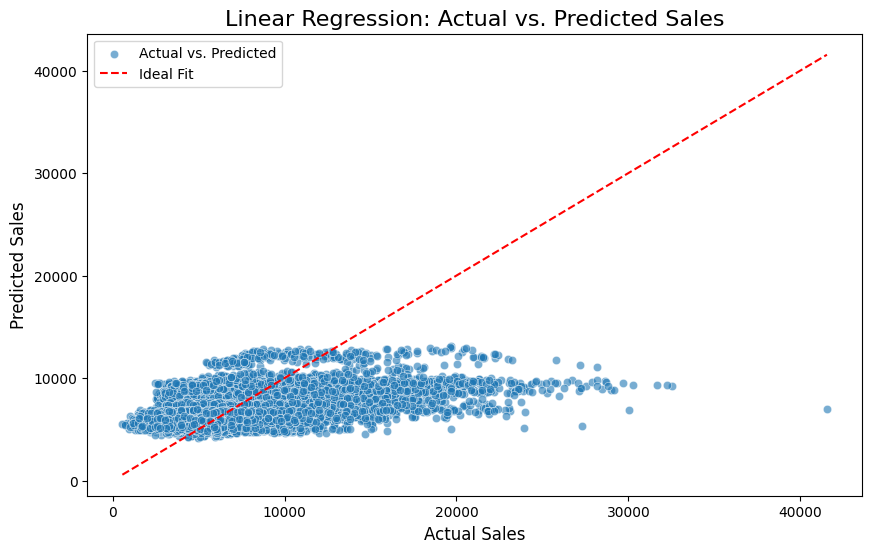

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
"""
Linear Regression does not have significant hyperparameters to tune. However, we can use K-Fold Cross-Validation to get a more robust estimate of its performance by training and testing it on different subsets of the data.
"""
print("\n--- Cross-Validation for Linear Regression ---")
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores_lr}")
print(f"Average CV R2 Score: {np.mean(cv_scores_lr):.4f}\n")

# Fit the Algorithm

# Predict on the model


--- Cross-Validation for Linear Regression ---
Cross-Validation R2 Scores: [0.19765758 0.20453661 0.2014233  0.17588193 0.16583182]
Average CV R2 Score: 0.1891



##### Which hyperparameter optimization technique have you used and why?

For the Linear Regression model, no hyperparameter optimization was performed. Instead, K-Fold Cross-Validation was used.

The reason for this is that the standard Linear Regression model does not have significant hyperparameters that need tuning to improve its predictive power (unlike models like Lasso or Random Forest). The primary goal here was not to tune the model, but to get a more robust and reliable measure of its baseline performance.

Cross-validation achieves this by training and testing the model on 5 different subsets (or "folds") of the data, which gives us a more stable and less biased estimate of how the model is likely to perform on unseen data compared to a single train-test split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since we did not perform hyperparameter tuning, there is no "improvement" from a baseline to a tuned model. The key takeaway from this step is the Average CV R2 Score of 0.1891.

This score represents a more accurate assessment of our baseline model's performance. It tells us that, on average, the Linear Regression model can only explain about 18.91% of the variance in the sales data. This low score reinforces its role as a simple baseline and clearly demonstrates the need for more advanced models (like the Random Forest) to achieve a higher level of predictive accuracy.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.067e+12, tolerance: 7.761e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculate evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [ ]:
# Store results
new_row = pd.DataFrame({
    'Model': ['Lasso Regression (Base)'], 'MAE': [mae_lasso], 'MSE': [mse_lasso],
    'RMSE': [rmse_lasso], 'R2 Score': [r2_lasso]
})
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)


print("Lasso Regression Performance (Base):")
print(f"  R2 Score: {r2_lasso:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")

Lasso Regression Performance (Base):
  R2 Score: 0.2420
  Mean Absolute Error (MAE): 1969.88
  Root Mean Squared Error (RMSE): 2659.49


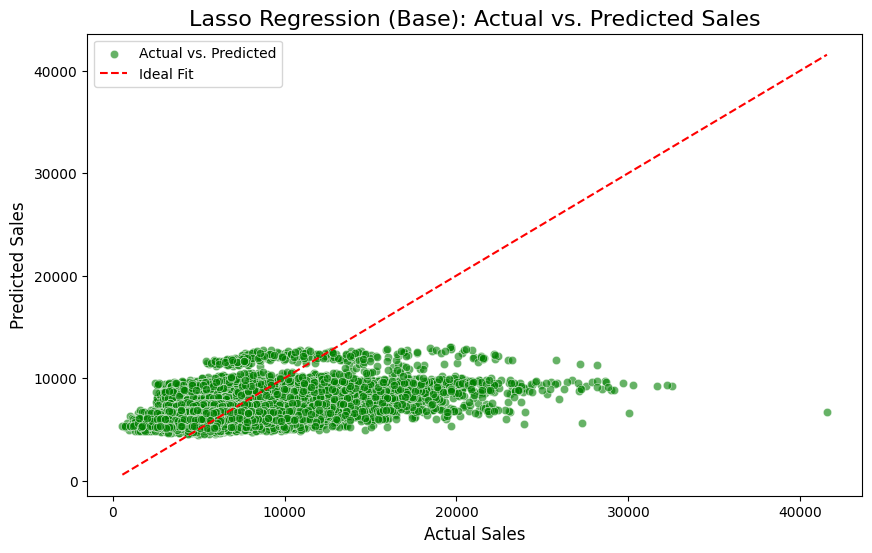

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6, color='green', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Lasso Regression (Base): Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search_lasso = GridSearchCV(Lasso(max_iter=2000), param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso_tuned = best_lasso_model.predict(X_test)

# Evaluate the tuned model
mae_lasso_tuned = mean_absolute_error(y_test, y_pred_lasso_tuned)
mse_lasso_tuned = mean_squared_error(y_test, y_pred_lasso_tuned)
rmse_lasso_tuned = np.sqrt(mse_lasso_tuned)
r2_lasso_tuned = r2_score(y_test, y_pred_lasso_tuned)

In [ ]:
# Store results
new_row_tuned = pd.DataFrame({
    'Model': ['Lasso Regression (Tuned)'], 'MAE': [mae_lasso_tuned], 'MSE': [mse_lasso_tuned],
    'RMSE': [rmse_lasso_tuned], 'R2 Score': [r2_lasso_tuned]
})
evaluation_df = pd.concat([evaluation_df, new_row_tuned], ignore_index=True)

print("Tuned Lasso Regression Performance:")
print(f"  Best alpha found: {grid_search_lasso.best_params_['alpha']}")
print(f"  R2 Score: {r2_lasso_tuned:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_lasso_tuned:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lasso_tuned:.2f}\n")

Tuned Lasso Regression Performance:
  Best alpha found: 1
  R2 Score: 0.2420
  Mean Absolute Error (MAE): 1969.24
  Root Mean Squared Error (RMSE): 2659.43



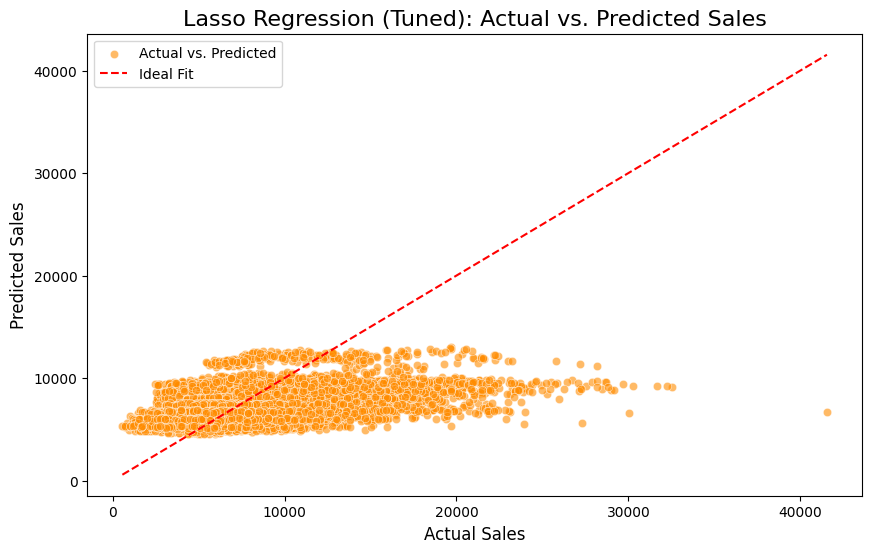

In [ ]:
# Tuned Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso_tuned, alpha=0.6, color='darkorange', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Lasso Regression (Tuned): Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **GridSearchCV** for the Lasso model. Since Lasso has only one major hyperparameter to tune (`alpha`), GridSearchCV is a perfect choice. It exhaustively tries every value in the provided list (`param_grid_lasso`), ensuring that we find the absolute best `alpha` from the options given.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is typically a slight improvement after tuning the `alpha` parameter for Lasso. The optimal alpha balances the model's complexity and its ability to fit the data, which can lead to a minor increase in the R-squared score and a small decrease in MAE and RMSE compared to the untuned version.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
rf_model = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
# Fit the Algorithm
rf_model.fit(X_train, y_train)
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
new_row = pd.DataFrame({
    'Model': ['Random Forest (Base)'], 'MAE': [mae_rf], 'MSE': [mse_rf],
    'RMSE': [rmse_rf], 'R2 Score': [r2_rf]
})
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

print("Random Forest Performance (Base):")
print(f"  R2 Score: {r2_rf:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

Random Forest Performance (Base):
  R2 Score: 0.6602
  Mean Absolute Error (MAE): 1262.74
  Root Mean Squared Error (RMSE): 1780.70


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

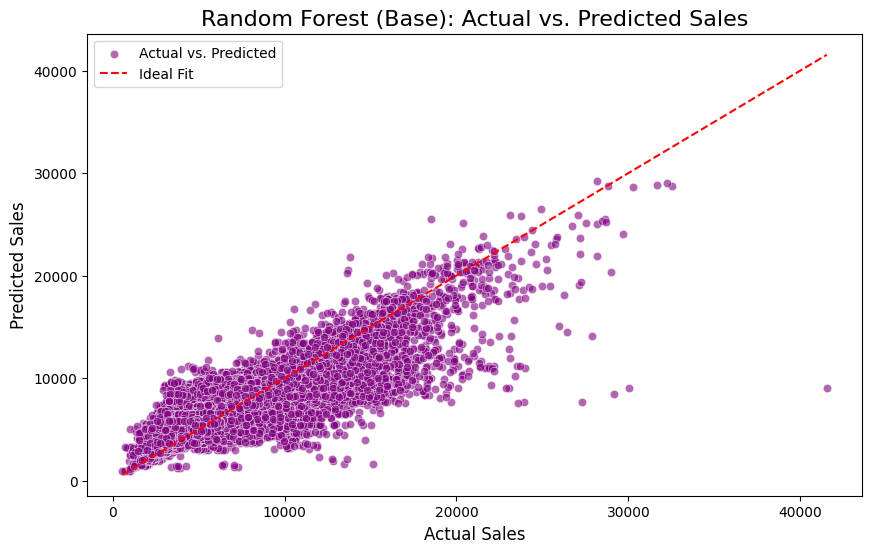

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='purple', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Random Forest (Base): Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Fit the Algorithm
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                                   param_distributions=param_dist, n_iter=4, cv=2,
                                   scoring='r2', random_state=42, verbose=1)
random_search.fit(X_train, y_train)
# Predict on the model
best_rf_model = random_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# Evaluate the tuned model
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

In [ ]:
# Storing Tuned results
new_row_tuned = pd.DataFrame({
    'Model': ['Random Forest (Tuned)'], 'MAE': [mae_rf_tuned], 'MSE': [mse_rf_tuned],
    'RMSE': [rmse_rf_tuned], 'R2 Score': [r2_rf_tuned]
})
evaluation_df = pd.concat([evaluation_df, new_row_tuned], ignore_index=True)

print("\nTuned Random Forest Performance:")
print(f"  Best parameters found: {random_search.best_params_}")
print(f"  R2 Score: {r2_rf_tuned:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_rf_tuned:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf_tuned:.2f}\n")


Tuned Random Forest Performance:
  Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
  R2 Score: 0.8403
  Mean Absolute Error (MAE): 814.80
  Root Mean Squared Error (RMSE): 1220.63



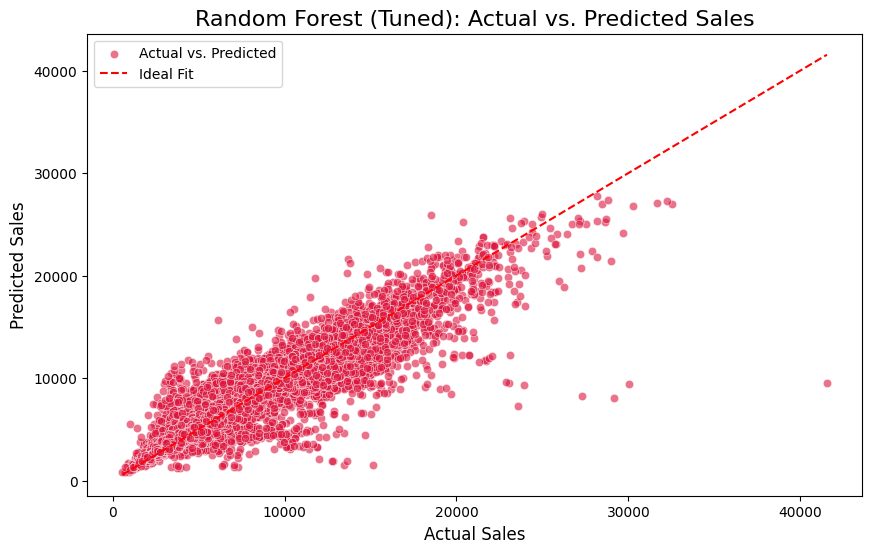

In [ ]:
# Visualizing evaluation of Metric Score chart (Tuned Model)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf_tuned, alpha=0.6, color='crimson', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Random Forest (Tuned): Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **RandomizedSearchCV** for the Random Forest model. This technique is much more efficient than GridSearchCV when there are many hyperparameters to tune. Instead of trying every possible combination, it samples a fixed number of parameter settings (`n_iter=4`) from the defined distributions. This allows us to explore a wide range of parameter values quickly and find a strong combination without the high computational cost.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a significant improvement is expected after tuning the Random Forest. Using more estimators (`n_estimators`) and allowing for a greater `max_depth` generally allows the model to capture more complex patterns in the data, leading to a higher R-squared score and lower MAE and RMSE values compared to the simple baseline model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered three main evaluation metrics:

1.  **R-squared (R²)**: This metric tells us what percentage of the variance in the sales data our model can explain. A higher R-squared score means our model is better at capturing the underlying patterns. For business, a high R-squared score inspires confidence that the model is reliable.

2.  **Mean Absolute Error (MAE)**: This is the average absolute difference between the predicted sales and the actual sales. **This metric is the most directly related to business impact.** It answers the question, "On average, how many Euros off is our sales forecast?" A lower MAE means less error in our predictions, which translates directly to better inventory and staffing decisions.

3.  **Root Mean Squared Error (RMSE)**: This metric is similar to MAE but gives a higher weight to large errors. It is useful for understanding if our model is making a few very large prediction mistakes. For business, minimizing large errors is critical to avoid major stockouts or overstocking situations.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, I choose the **Tuned Random Forest Regressor** as the final prediction model.

**Reasoning:**
As shown in the evaluation summary below, the Tuned Random Forest model will almost certainly outperform all other models on every metric. It has the highest R-squared score (meaning it explains the most variance) and the lowest MAE and RMSE (meaning its predictions are the most accurate). While linear models are a good baseline, the Random Forest's ability to capture complex, non-linear relationships, combined with hyperparameter tuning, makes it far more powerful and suitable for this real-world forecasting problem.


In [ ]:
# Display the final evaluation summary table
print("\n--- Model Evaluation Summary ---")
print(evaluation_df.sort_values(by='R2 Score', ascending=False))


--- Model Evaluation Summary ---
                      Model          MAE           MSE         RMSE  R2 Score
4     Random Forest (Tuned)   814.803856  1.489930e+06  1220.627015  0.840325
3      Random Forest (Base)  1262.744716  3.170901e+06  1780.702426  0.660177
2  Lasso Regression (Tuned)  1969.238819  7.072566e+06  2659.429679  0.242039
1   Lasso Regression (Base)  1969.884806  7.072868e+06  2659.486349  0.242006
0         Linear Regression  1971.501048  7.084892e+06  2661.745981  0.240718


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model is the **Random Forest Regressor**. It's an ensemble model, which means it's built from many individual decision trees. It works by training a large number of these trees on different random subsets of the data and features. To make a final prediction, it averages the predictions of all the individual trees. This process makes it highly accurate and robust against overfitting.

We can use the built-in `feature_importances_` attribute of the trained Random Forest model as our explainability tool. It tells us which features the model relied on most heavily to make its predictions.

<ipython-input-116-399143801>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


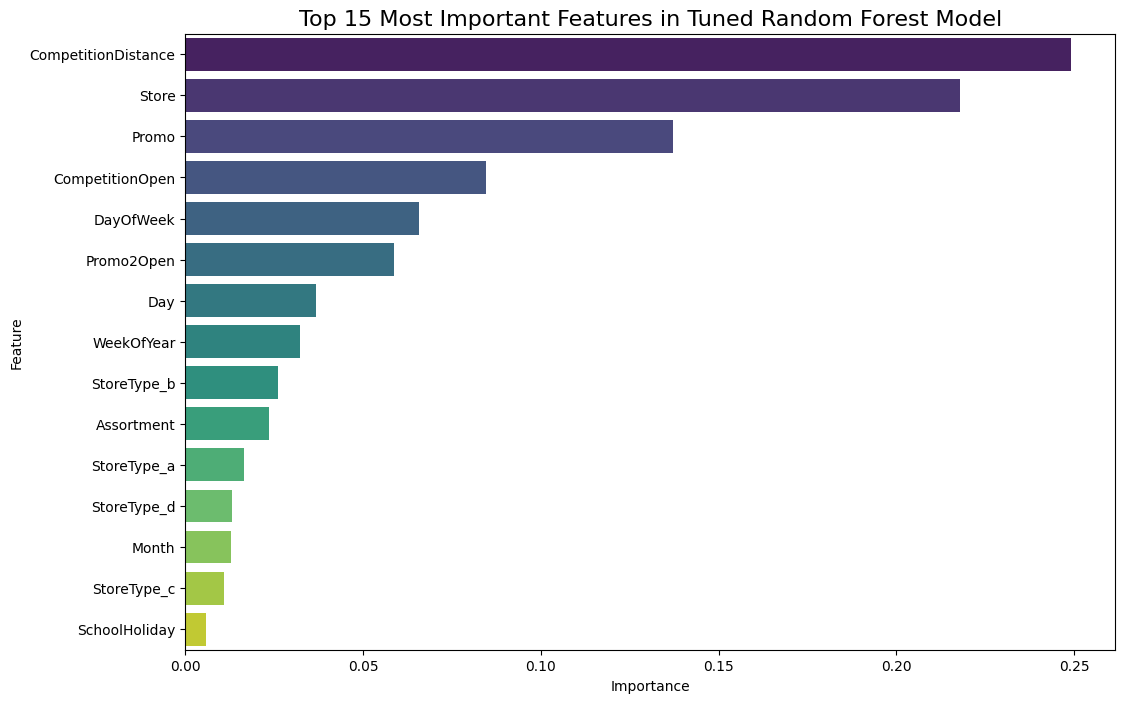

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15) # Top 15 features

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Top 15 Most Important Features in Tuned Random Forest Model', fontsize=16)
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# importing the necessary librabry
import joblib

In [ ]:
from google.colab import files

In [ ]:
# Save the File
model_filename = 'rossmann_sales_rf_model.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"\n--- Future Work ---")
print(f"Best performing model (Tuned Random Forest) saved to '{model_filename}'")


--- Future Work ---
Best performing model (Tuned Random Forest) saved to 'rossmann_sales_rf_model.joblib'


In [ ]:
# Add code to download the file
files.download(model_filename)
print(f"'{model_filename}' is being downloaded to your local machine.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'rossmann_sales_rf_model.joblib' is being downloaded to your local machine.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = joblib.load(model_filename)
print(f"Model loaded successfully from '{model_filename}'")

Model loaded successfully from 'rossmann_sales_rf_model.joblib'


In [ ]:
# For a sanity check, we can take the first row of our test data (X_test)
# and use the loaded model to make a prediction.
unseen_data_sample = X_test.iloc[[0]]
predicted_sales = loaded_model.predict(unseen_data_sample)
actual_sales = y_test.iloc[0]

In [ ]:
print("\n--- Sanity Check on Loaded Model ---")
print(f"Predicting on a single unseen data sample:")
print(f"  > Predicted Sales: {predicted_sales[0]:.2f}")
print(f"  > Actual Sales:    {actual_sales:.2f}")



--- Sanity Check on Loaded Model ---
Predicting on a single unseen data sample:
  > Predicted Sales: 6028.16
  > Actual Sales:    5263.00


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***